<a href="https://colab.research.google.com/github/SoumyoNathTripathy/AI-Repo/blob/main/phising_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/phising ml/Phising_Training_Dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df.shape

(8955, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
key,8955.0,16821.000000,2585.230164,12344.0,14582.5,16821.0,19059.5,21298.0
having_IP,8955.0,0.307203,0.951697,-1.0,-1.0,1.0,1.0,1.0
URL_Length,8955.0,-0.635734,0.763660,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,8955.0,0.740480,0.672116,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,8955.0,0.709436,0.704809,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,8955.0,0.740704,0.671870,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,8955.0,-0.735343,0.677733,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,8955.0,0.071803,0.817419,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,8955.0,0.264545,0.908003,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,8955.0,-0.336460,0.941750,-1.0,-1.0,-1.0,1.0,1.0


In [ ]:
df.isnull().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

**observations**

1.There are a total of 8552 records and 32features in the dataset.

2.Each feature is integer datatype.

3.Some features having_IP , URL length , google index, SFH,Favicon  have zero values which represent missing data.

4.There are zero NaN values in the dataset.
In the outcome column, 1 represents safe and 0 represents  suspicious, -1 represents phising troubled.

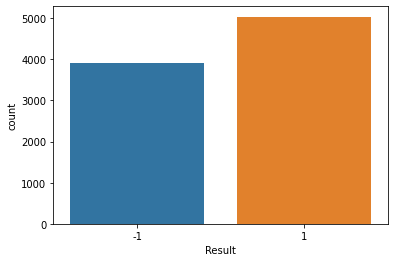

In [ ]:
sns.countplot(x = 'Result',data = df)

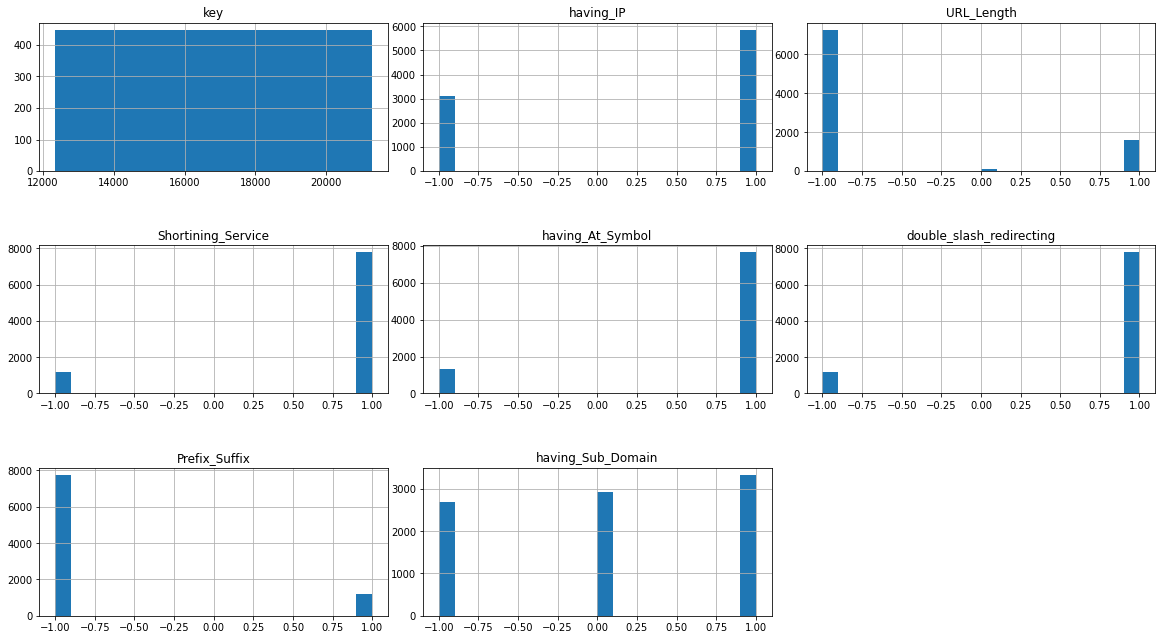

In [ ]:
import itertools

col = df.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

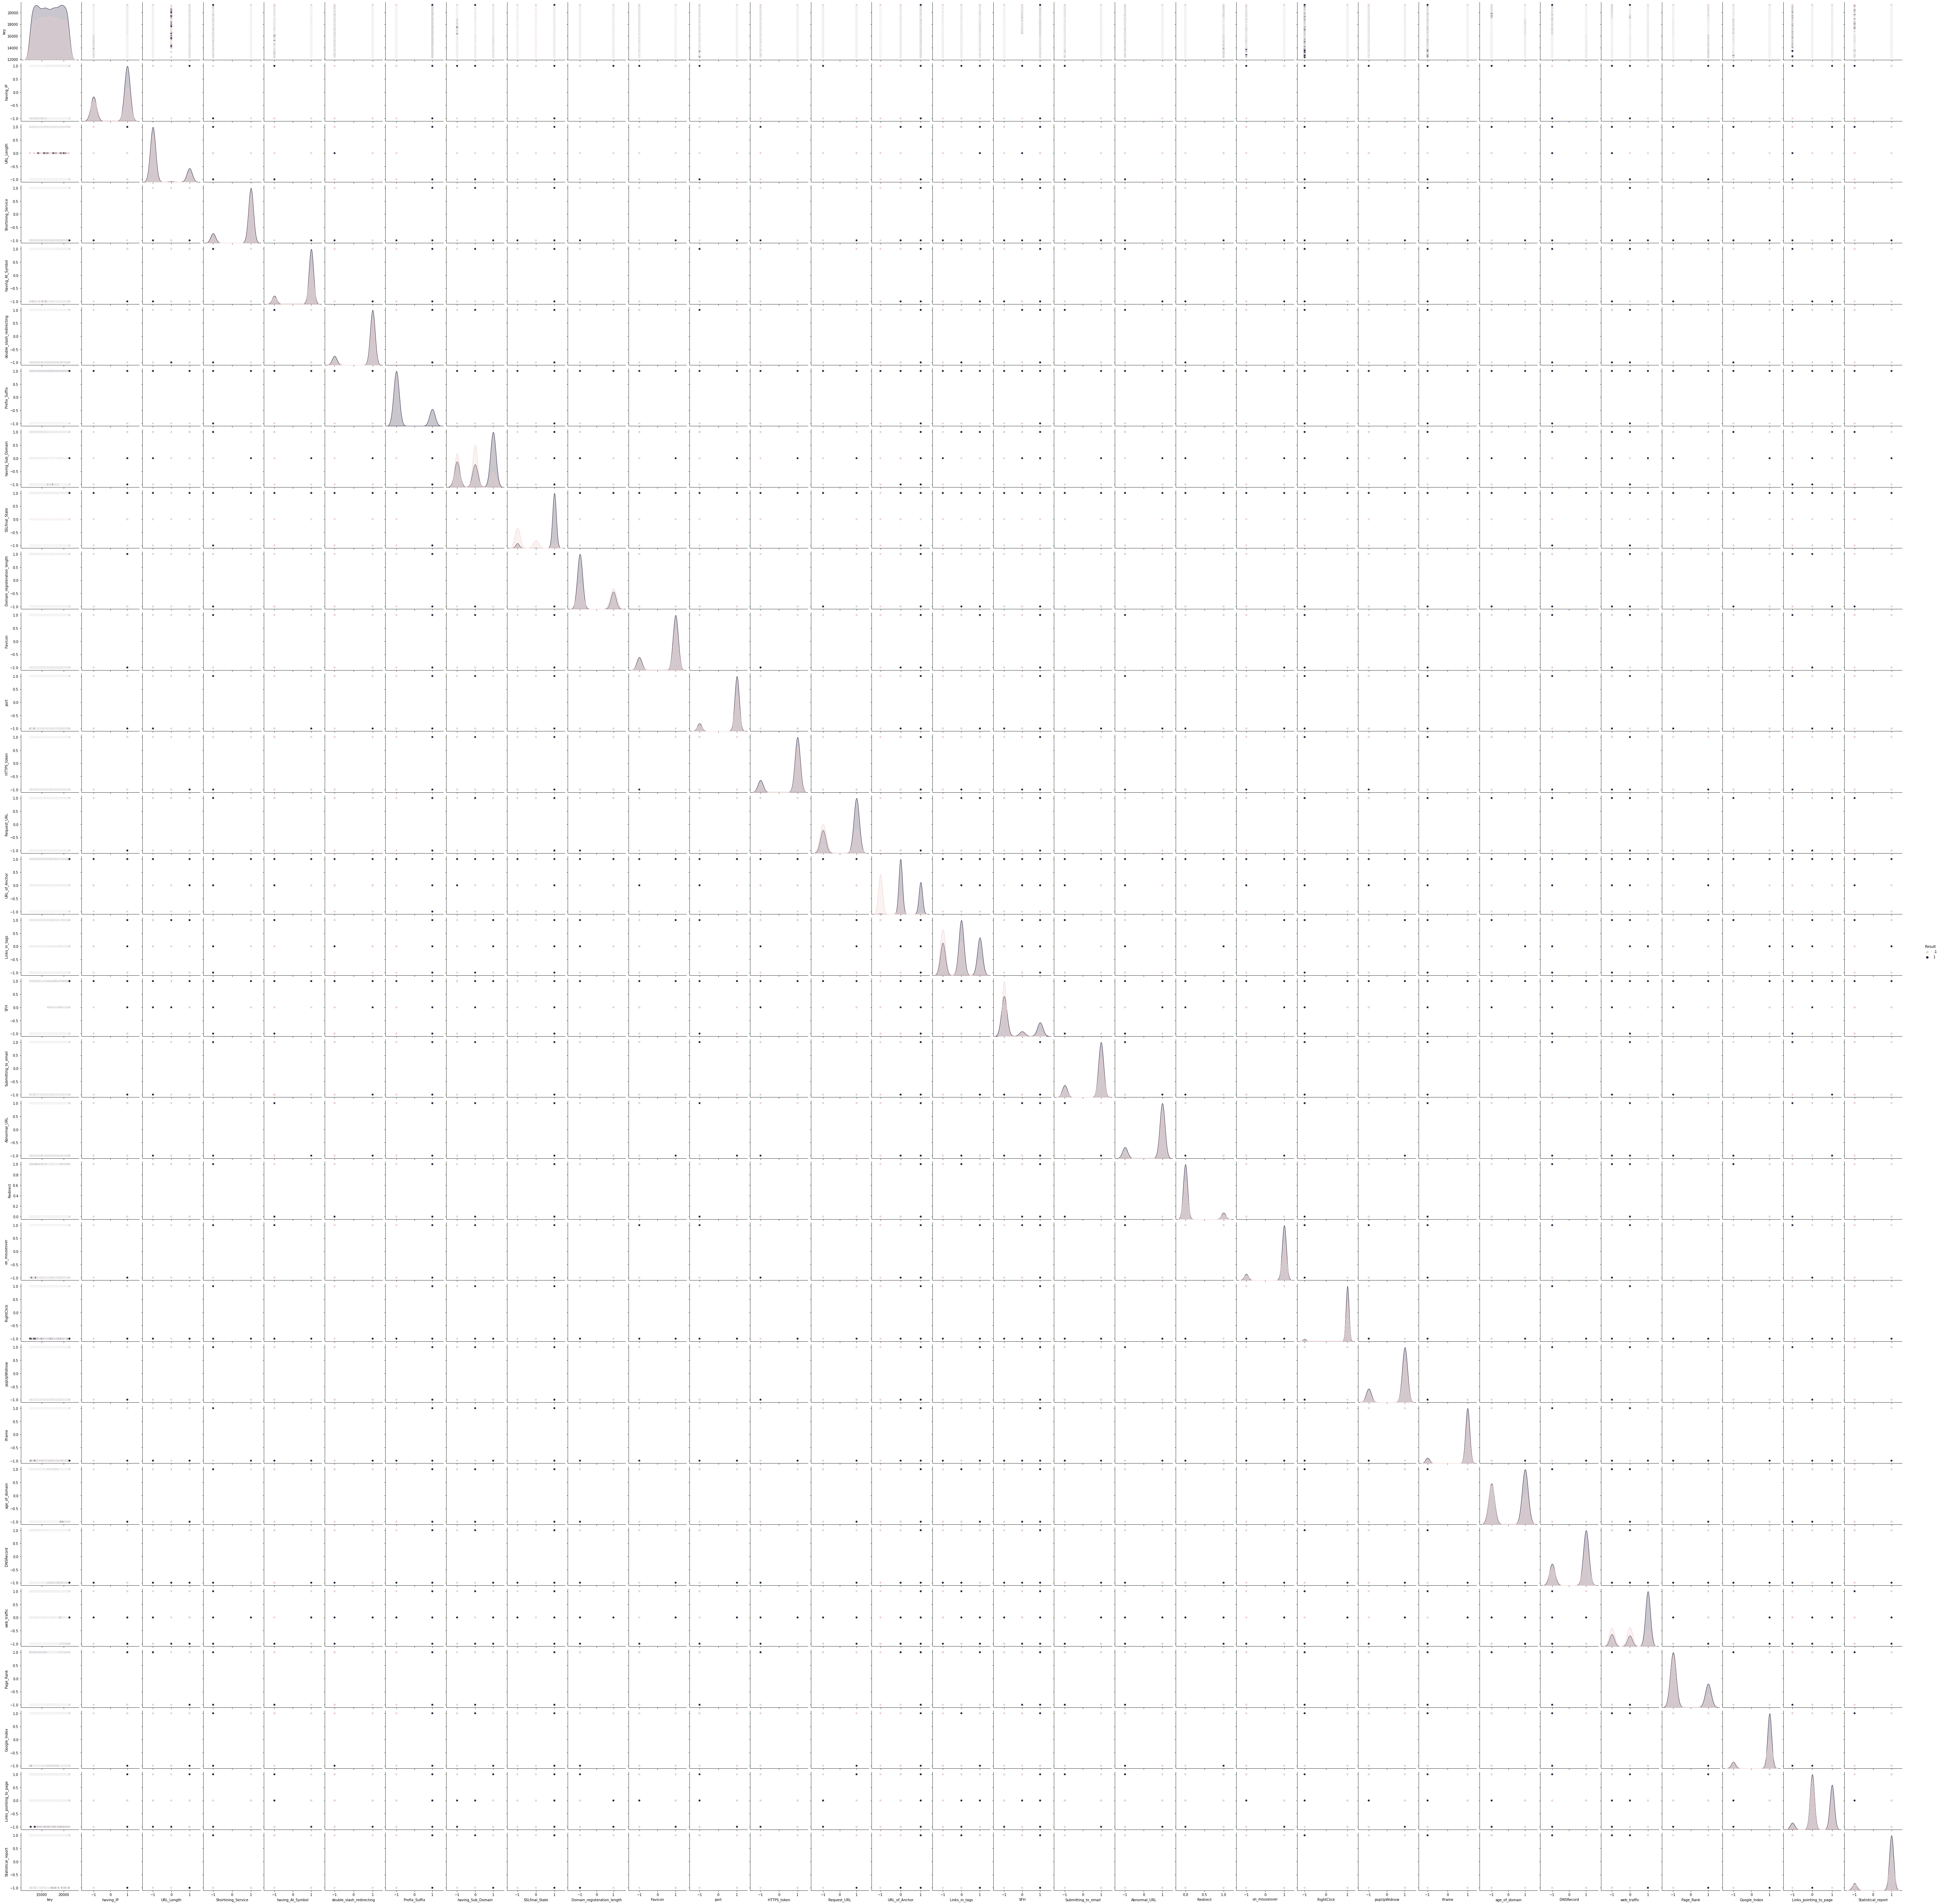

In [ ]:
sns.pairplot(data = df, hue = 'Result')
plt.show()

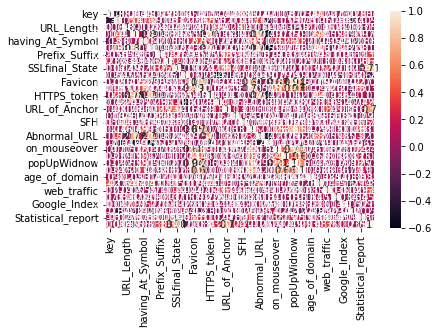

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()


**OBSERVATION**


In [ ]:
df_new = df
df_new[["having_IP", "URL_Length",  "having_At_Symbol","having_Sub_Domain","SSLfinal_State","port", "HTTPS_token" ,"Request_URL"  ,                  
"URL_of_Anchor",                  
"Links_in_tags" ,                 
"SFH",                           
"Submitting_to_email",            
"Abnormal_URL" ,                  
"Redirect"  ,                     
"on_mouseover"    ,               
"RightClick"  ,                   
"popUpWidnow" ,                                           
"age_of_domain"  ,                
"DNSRecord" ,                     
"web_traffic"   ,                 
"Page_Rank"   ,                   
"Google_Index" ,                  
"Links_pointing_to_page"   ,      
"Statistical_report" ,            
"Result"]] = df_new[["having_IP", "URL_Length",  "having_At_Symbol", "having_Sub_Domain","SSLfinal_State",
"port",                          
"HTTPS_token" ,                   
"Request_URL"  ,                  
"URL_of_Anchor",                  
"Links_in_tags" ,                 
"SFH",                           
"Submitting_to_email",            
"Abnormal_URL" ,                  
"Redirect"  ,                     
"on_mouseover"    ,               
"RightClick"  ,                   
"popUpWidnow" ,                                           
"age_of_domain"  ,                
"DNSRecord" ,                     
"web_traffic"   ,                 
"Page_Rank"   ,                   
"Google_Index" ,                  
"Links_pointing_to_page"   ,      
"Statistical_report" ,            
"Result"               ]].replace(0, np.NaN) 

df_new.isnull().sum()


key                               0
having_IP                         0
URL_Length                      114
Shortining_Service                0
having_At_Symbol                  0
double_slash_redirecting          0
Prefix_Suffix                     0
having_Sub_Domain              2926
SSLfinal_State                  946
Domain_registeration_length       0
Favicon                           0
port                              0
HTTPS_token                       0
Request_URL                       0
URL_of_Anchor                  4386
Links_in_tags                  3633
SFH                             642
Submitting_to_email               0
Abnormal_URL                      0
Redirect                       7935
on_mouseover                      0
RightClick                        0
popUpWidnow                       0
Iframe                            0
age_of_domain                     0
DNSRecord                         0
web_traffic                    2090
Page_Rank                   

In [ ]:
# Replacing NaN with mean values
df_new["URL_Length"].fillna(df_new["URL_Length"].mean(), inplace = True)
df_new["having_Sub_Domain"].fillna(df_new["having_Sub_Domain"].mean(), inplace = True)
df_new["SSLfinal_State"].fillna(df_new["SSLfinal_State"].mean(), inplace = True)
df_new["URL_of_Anchor"].fillna(df_new["URL_of_Anchor"].mean(), inplace = True)
df_new["Links_in_tags"].fillna(df_new["Links_in_tags"].mean(), inplace = True)
df_new["SFH"].fillna(df_new["SFH"].mean(), inplace = True)
df_new["Redirect"].fillna(df_new["Redirect"].mean(), inplace = True)
df_new["web_traffic"].fillna(df_new["web_traffic"].mean(), inplace = True)
df_new["Links_pointing_to_page"].fillna(df_new["Links_pointing_to_page"].mean(), inplace = True)


In [ ]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
key,8955.0,16821.000000,2585.230164,12344.0,14582.500000,16821.000000,19059.500000,21298.0
having_IP,8955.0,0.307203,0.951697,-1.0,-1.000000,1.000000,1.000000,1.0
URL_Length,8955.0,-0.643932,0.760240,-1.0,-1.000000,-1.000000,-1.000000,1.0
Shortining_Service,8955.0,0.740480,0.672116,-1.0,1.000000,1.000000,1.000000,1.0
having_At_Symbol,8955.0,0.709436,0.704809,-1.0,1.000000,1.000000,1.000000,1.0
double_slash_redirecting,8955.0,0.740704,0.671870,-1.0,1.000000,1.000000,1.000000,1.0
Prefix_Suffix,8955.0,-0.735343,0.677733,-1.0,-1.000000,-1.000000,-1.000000,1.0
having_Sub_Domain,8955.0,0.106651,0.815887,-1.0,-1.000000,0.106651,1.000000,1.0
SSLfinal_State,8955.0,0.295792,0.903439,-1.0,-1.000000,1.000000,1.000000,1.0
Domain_registeration_length,8955.0,-0.336460,0.941750,-1.0,-1.000000,-1.000000,1.000000,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_scaled = sc.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled)

X = df_scaled.iloc[:, 1:31].values
Y = df_scaled.iloc[:, 31].values
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = df_new['Result'] )
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (7164, 30)
X_test shape: (1791, 30)
Y_train shape: (7164,)
Y_test shape: (1791,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

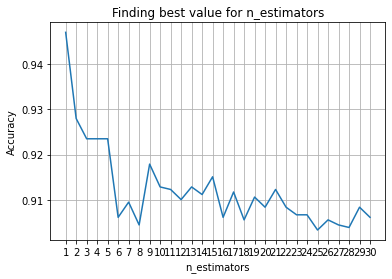

Highest value:  0.9469570072585148


In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
Y_pred_dectree = dectree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
print("Decision tree: " + str(accuracy_dectree * 100))

Decision tree: 94.9748743718593
